# Growth Stock Portfolio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Growth Stock
title = "Growth Stock for July"
symbols = ['STNE', 'CRWD', 'ZNGA']
start = '2020-04-01'
end = '2020-06-26'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

85

In [7]:
df.head()

,STNE,CRWD,ZNGA
Date,,,
2020-04-01,19.530001,54.580002,6.76
2020-04-02,19.879999,56.689999,6.68
2020-04-03,17.820000,57.820000,6.64
2020-04-06,22.240000,59.070000,6.81
2020-04-07,23.639999,59.599998,6.56


In [8]:
df.tail()

,STNE,CRWD,ZNGA
Date,,,
2020-06-19,38.139999,101.080002,9.29
2020-06-22,39.689999,105.019997,9.44
2020-06-23,41.549999,104.269997,9.57
2020-06-24,38.430000,103.699997,9.48
2020-06-25,39.959999,105.709999,9.61


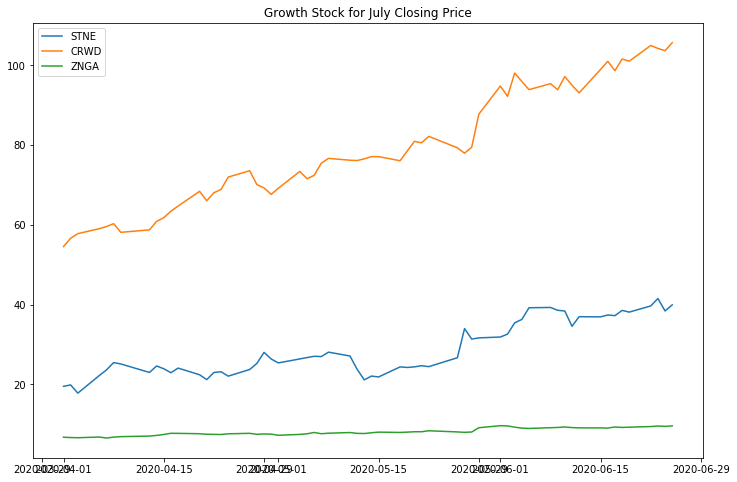

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

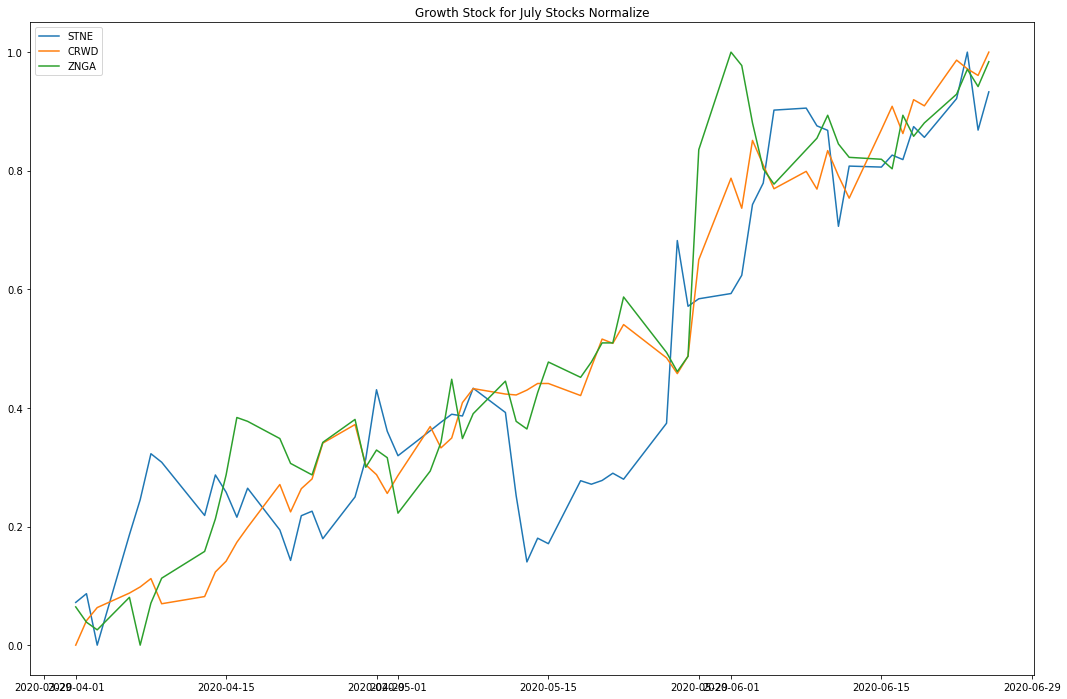

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

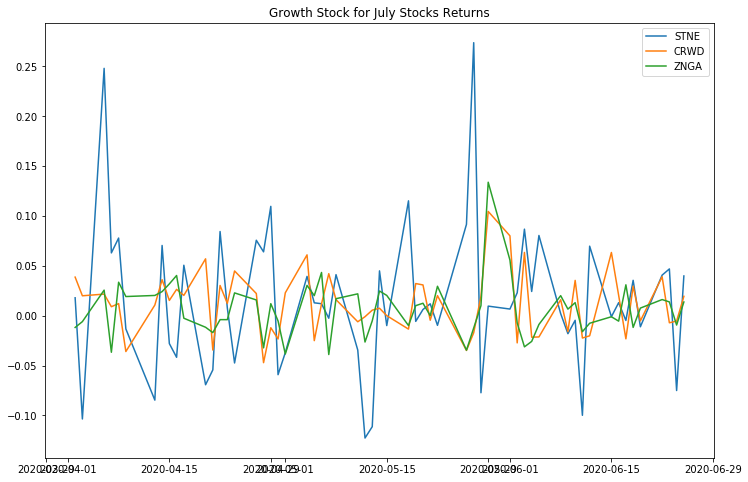

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title + ' Stocks Returns')
plt.legend(labels=stock_rets.columns)

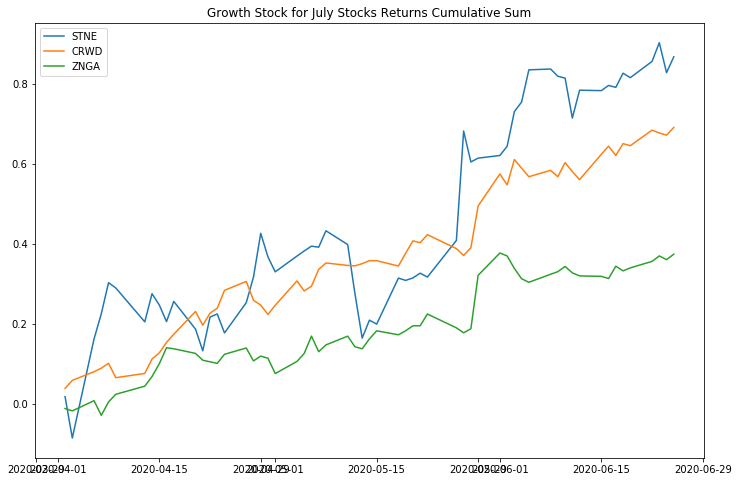

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title(title + ' Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

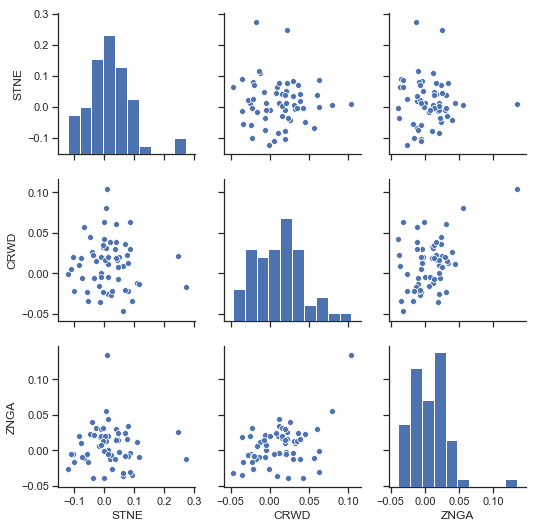

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

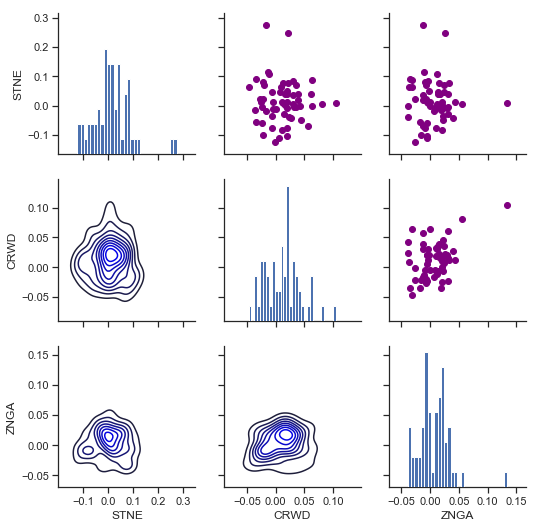

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

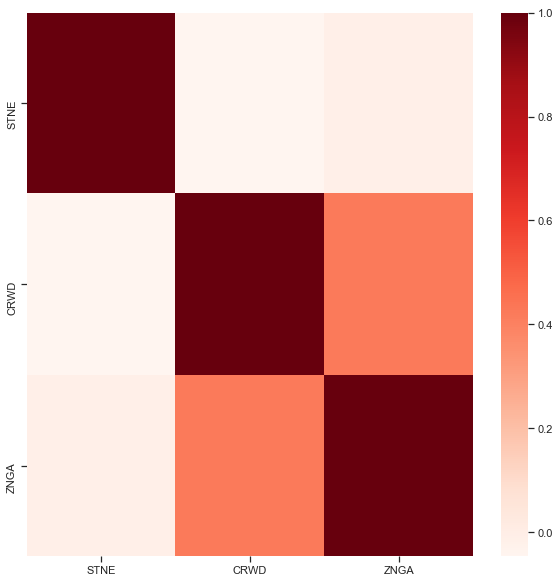

In [17]:
plt.figure(figsize=(10,10))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

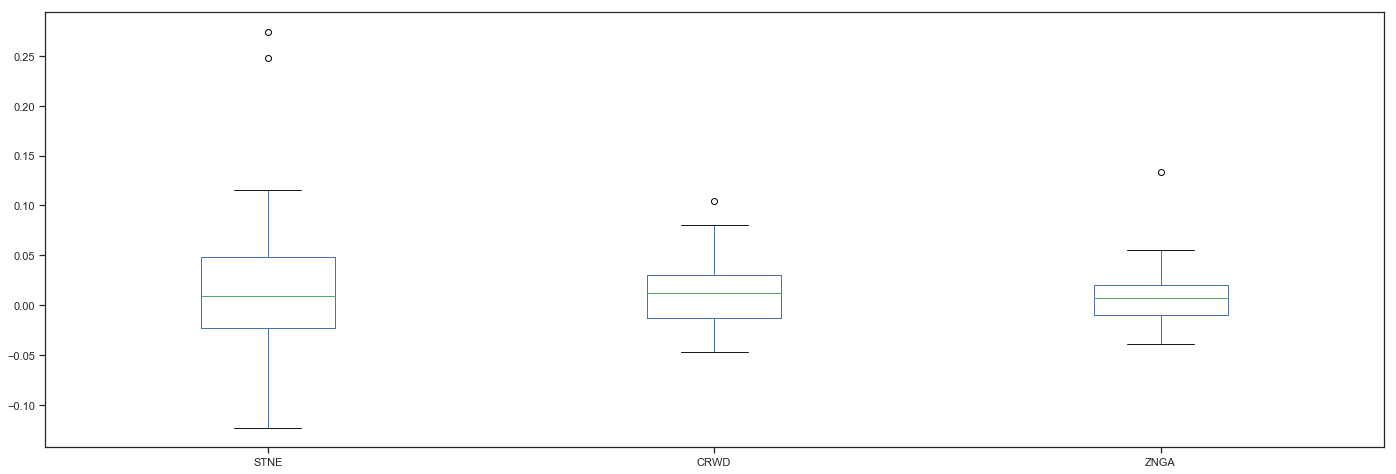

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(24,8))

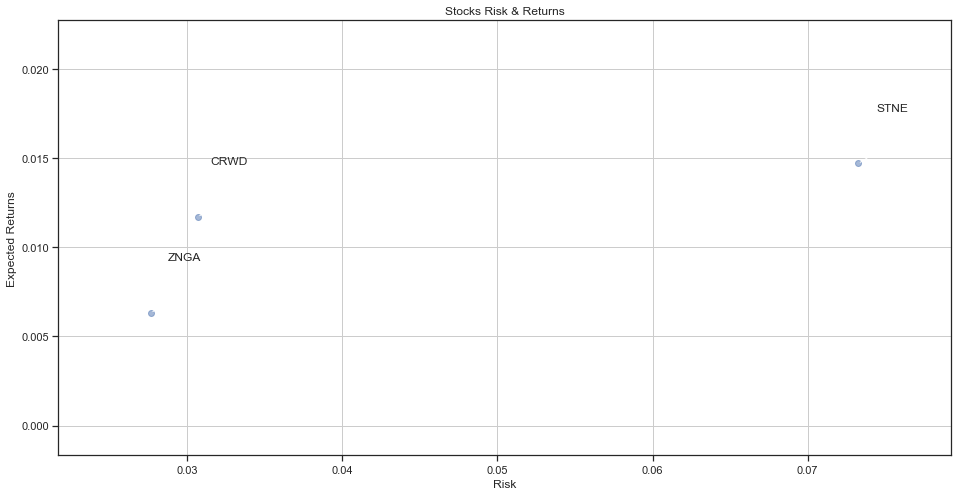

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.std(), rets.mean()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

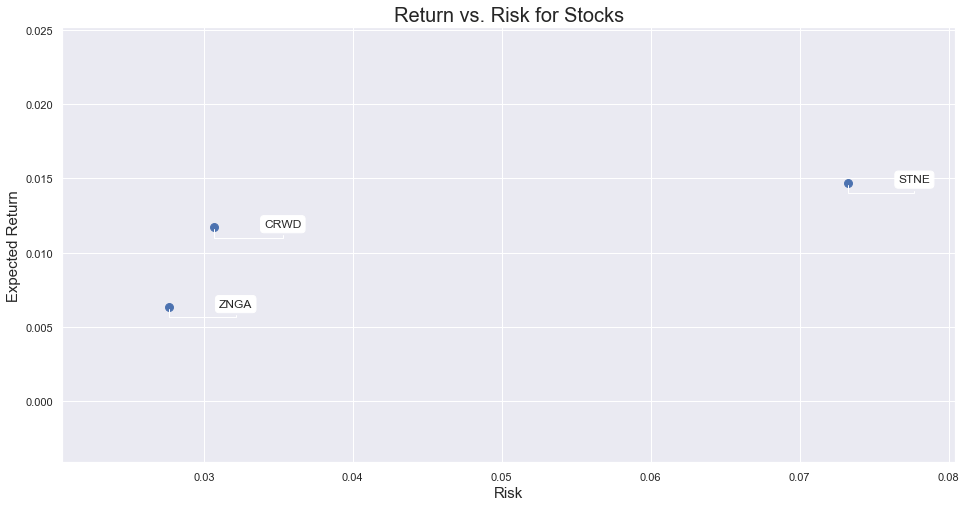

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(), s=area)
plt.xlabel("Risk", fontsize=15)
plt.ylabel("Expected Return", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.std(), rets.mean()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
def annual_risk_return(stock_rets):
    tradeoff = stock_rets.agg(["mean", "std"]).T
    tradeoff.columns = ["Return", "Risk"]
    tradeoff.Return = tradeoff.Return*252
    tradeoff.Risk = tradeoff.Risk * np.sqrt(252)
    return tradeoff

In [22]:
tradeoff = annual_risk_return(stock_rets)
tradeoff

,Return,Risk
STNE,3.708787,1.163257
CRWD,2.953634,0.487298
ZNGA,1.598953,0.439222


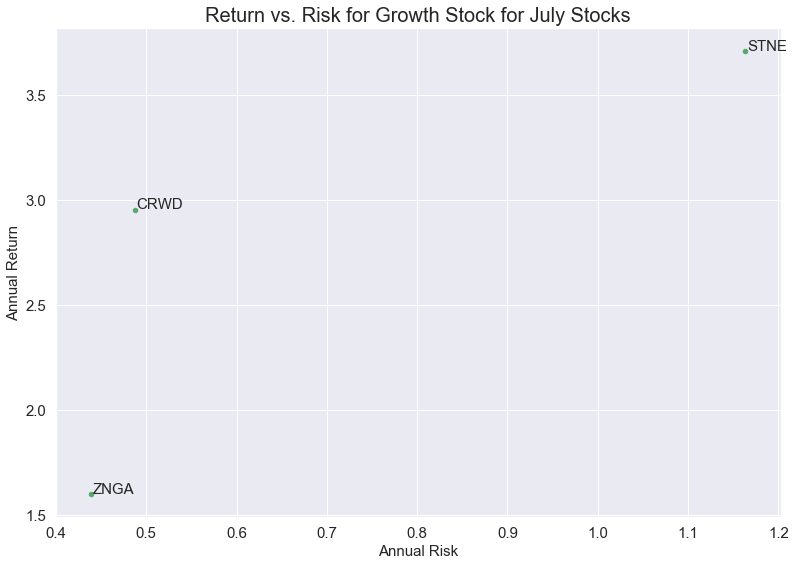

In [23]:
import itertools

colors = itertools.cycle(["r", "b", "g"])

tradeoff.plot(x = "Risk", y = "Return", kind = "scatter", figsize = (13,9), s = 20, fontsize = 15, c='g')
for i in tradeoff.index:
    plt.annotate(i, xy=(tradeoff.loc[i, "Risk"]+0.002, tradeoff.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Annual Risk", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Return vs. Risk for " + title + " Stocks", fontsize = 20)
plt.show()

In [24]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

ZNGA  ZNGA    1.000000
CRWD  CRWD    1.000000
STNE  STNE    1.000000
ZNGA  CRWD    0.427355
CRWD  ZNGA    0.427355
      STNE    0.046759
STNE  CRWD    0.046759
ZNGA  STNE    0.006471
STNE  ZNGA    0.006471
dtype: float64

In [25]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,STNE,CRWD,ZNGA
Date,,,
2020-04-02,0.354740,0.565720,0.157151
2020-04-03,0.048221,0.442260,0.190980
2020-04-06,0.935069,0.453374,0.373771
2020-04-07,0.468298,0.369996,0.013210
2020-04-08,0.505836,0.390488,0.419681


In [26]:
Normalized_Value.corr()

,STNE,CRWD,ZNGA
STNE,1.000000,-0.046759,-0.006471
CRWD,-0.046759,1.000000,0.427355
ZNGA,-0.006471,0.427355,1.000000


In [27]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

ZNGA  ZNGA    1.000000
CRWD  CRWD    1.000000
STNE  STNE    1.000000
ZNGA  CRWD    0.427355
CRWD  ZNGA    0.427355
      STNE    0.046759
STNE  CRWD    0.046759
ZNGA  STNE    0.006471
STNE  ZNGA    0.006471
dtype: float64

In [28]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
STNE    0.014717
CRWD    0.011721
ZNGA    0.006345
dtype: float64
--------------------------------------------------
Stock risks:
STNE    0.073278
CRWD    0.030697
ZNGA    0.027668
dtype: float64


In [29]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
ZNGA,0.006345,0.027668
CRWD,0.011721,0.030697
STNE,0.014717,0.073278


In [30]:
table.sort_values(by='Risk')

,Returns,Risk
ZNGA,0.006345,0.027668
CRWD,0.011721,0.030697
STNE,0.014717,0.073278


In [31]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
STNE,0.014717,0.073278,0.064377
CRWD,0.011721,0.030697,0.056057
ZNGA,0.006345,0.027668,-0.132098


In [32]:
table['Max Returns'] = rets.max()

In [33]:
table['Min Returns'] = rets.min()

In [34]:
table['Median Returns'] = rets.median()

In [35]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
STNE,0.014717,0.073278,0.064377,0.273783,-0.122742,0.009560,3.981261
CRWD,0.011721,0.030697,0.056057,0.104528,-0.047147,0.012340,1.938286
ZNGA,0.006345,0.027668,-0.132098,0.133829,-0.038994,0.007592,1.371309


In [36]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
STNE,0.014717,0.073278,0.064377,0.273783,-0.122742,0.009560,3.981261,0.000459
CRWD,0.011721,0.030697,0.056057,0.104528,-0.047147,0.012340,1.938286,0.000226
ZNGA,0.006345,0.027668,-0.132098,0.133829,-0.038994,0.007592,1.371309,0.000160


In [37]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
STNE,0.014717,0.073278,0.064377,0.273783,-0.122742,0.009560,3.981261,0.000459,7.352104
CRWD,0.011721,0.030697,0.056057,0.104528,-0.047147,0.012340,1.938286,0.000226,6.097661
ZNGA,0.006345,0.027668,-0.132098,0.133829,-0.038994,0.007592,1.371309,0.000160,1.837513


In [38]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
ZNGA,0.006345,0.027668,-0.132098,0.133829,-0.038994,0.007592,1.371309,0.000160,1.837513
CRWD,0.011721,0.030697,0.056057,0.104528,-0.047147,0.012340,1.938286,0.000226,6.097661
STNE,0.014717,0.073278,0.064377,0.273783,-0.122742,0.009560,3.981261,0.000459,7.352104
